In [1]:
from model_with_policy import borg_ebola

from ema_workbench import Model, IntegerParameter, RealParameter, TimeSeriesOutcome, ScalarOutcome, Policy

model = Model('Ebola', function=borg_ebola)


model.outcomes = [ScalarOutcome('Effectiveness'),
                  ScalarOutcome('Speed'),
                  ScalarOutcome('Equity in met demand'),
                  ScalarOutcome('Equity in arrival times'),
                  ScalarOutcome('Cost per death prevented')]


model.uncertainties = [IntegerParameter('I4', 1, 8),
                       IntegerParameter('I14', 20, 35),
                       IntegerParameter('I15', 25, 40),
                       RealParameter('beta_i', 0.1, 0.5),
                       RealParameter('travel_rate', 0.04, 0.1)]


model.levers = [RealParameter('c1', -1.0, 1.0),
               RealParameter('c2', -1.0, 1.0),
               RealParameter('r1', 0.000001, 1.0),
               RealParameter('r2', 0.000001, 1.0),
               RealParameter('w', 0, 1.0)]
                

policies = [Policy("141", **{'c1' : 0.189347,
                                          'c2' : 0.297782,
                                          'r1' : 0.663825,
                                          'r2' : 0.677523,
                                          'w' : 0.470387}),
           Policy("185", **{'c1' : 0.310568,
                                          'c2' : 0.006200,
                                          'r1' : 0.539050,
                                          'r2' : 0.604281,
                                          'w' : 0.624870})]



In [2]:
from ema_workbench.util import experiments_to_scenarios
from ema_workbench import load_results

results2 = load_results(r'policy148_390_10000.tar.gz')

experiments2,outcomes2 = results2



cleaned_experiments = experiments2.drop(labels=['c1','c2','r1','r2','w', 'scenario'], axis=1)

experiments = cleaned_experiments.to_records()



scenarios_full = experiments_to_scenarios(experiments)

scenarios = scenarios_full[0:10000]
print(len(scenarios))

10000


In [ ]:
from ema_workbench import ema_logging

ema_logging.log_to_stderr(ema_logging.INFO)

from ema_workbench import SequentialEvaluator

from ema_workbench import MultiprocessingEvaluator



import time
start_time = time.time()

'''
with SequentialEvaluator(model) as evaluator:
    experiments, outcomes = evaluator.perform_experiments(scenarios=3, policies = policies)


'''
with MultiprocessingEvaluator(model) as evaluator:
    results = evaluator.perform_experiments(scenarios=scenarios, policies=policies)
    

    
print("--- %s seconds ---" % (time.time() - start_time))

from ema_workbench import save_results
save_results(results, r'./policy141_10000_validation.tar.gz')



[MainProcess/INFO] pool started
[MainProcess/INFO] performing 10000 scenarios * 2 policies * 1 model(s) = 20000 experiments


In [14]:
print(results)
print(results2)

(    I14   I15   I4    beta_i  travel_rate        c1        c2        r1  \
0  20.0  38.0  3.0  0.129005     0.072653  0.189347  0.297782  0.663825   
1  34.0  35.0  1.0  0.144388     0.061747  0.189347  0.297782  0.663825   
2  27.0  33.0  7.0  0.290535     0.092173  0.189347  0.297782  0.663825   
3  22.0  37.0  4.0  0.454084     0.045337  0.189347  0.297782  0.663825   
4  25.0  31.0  5.0  0.345160     0.076736  0.189347  0.297782  0.663825   
5  30.0  29.0  5.0  0.484739     0.056944  0.189347  0.297782  0.663825   
6  34.0  39.0  8.0  0.243651     0.050840  0.189347  0.297782  0.663825   
7  29.0  25.0  4.0  0.386583     0.094159  0.189347  0.297782  0.663825   
8  32.0  26.0  2.0  0.334638     0.085518  0.189347  0.297782  0.663825   
9  24.0  31.0  6.0  0.218927     0.068817  0.189347  0.297782  0.663825   

         r2         w scenario policy  model  
0  0.677523  0.470387    10033    141  Ebola  
1  0.677523  0.470387    10034    141  Ebola  
2  0.677523  0.470387    10035  

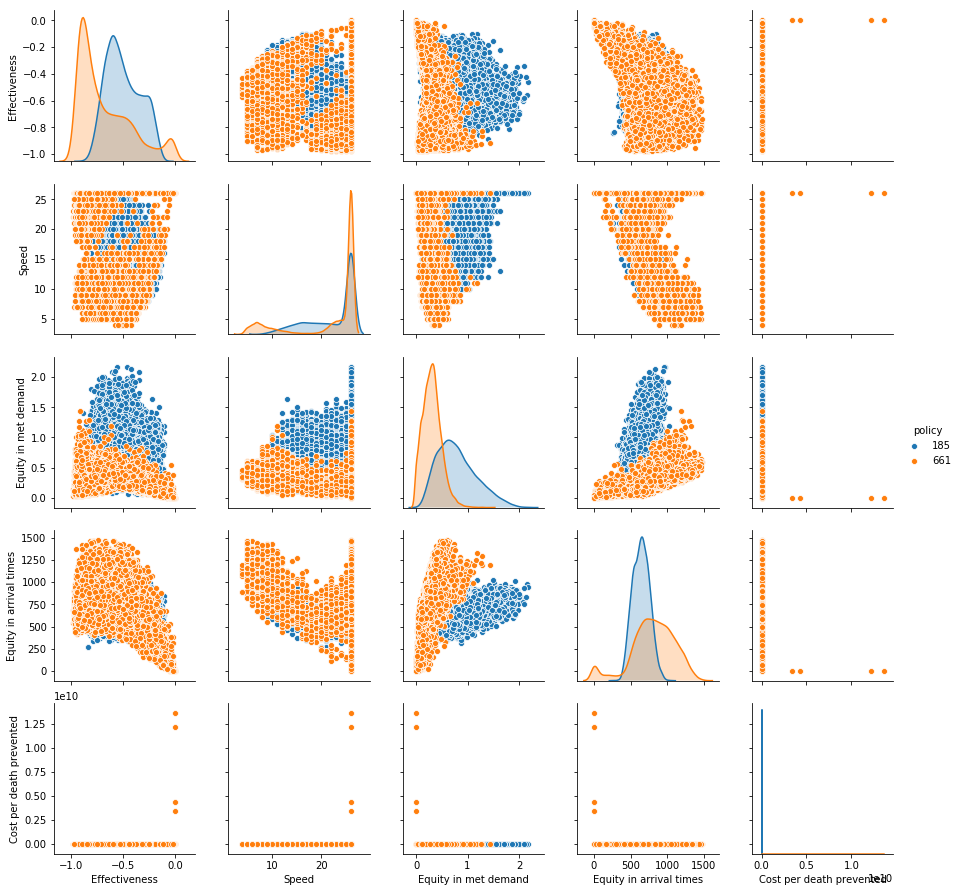

In [6]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

experiments, outcomes = results
policies = experiments['policy']

data = pd.DataFrame.from_dict(outcomes)
data['policy'] = policies

sns.pairplot(data, hue='policy',  vars=outcomes.keys(), )
plt.show()



In [ ]:
from model_with_policy import borg_ebola
print(borg_ebola(c1 =0.5, c2=0.7, r1=0.2, r2=0.5, w=0.4))


from ema_workbench import Model, IntegerParameter, RealParameter, TimeSeriesOutcome, ScalarOutcome, Policy

model = Model('Ebola', function=borg_ebola)


model.outcomes = [ScalarOutcome('Effectiveness', ScalarOutcome.MINIMIZE),
                  ScalarOutcome('Speed', ScalarOutcome.MINIMIZE),
                  ScalarOutcome('Equity in met demand', ScalarOutcome.MINIMIZE),
                  ScalarOutcome('Equity in arrival times', ScalarOutcome.MINIMIZE),
                  ScalarOutcome('Cost per death prevented', ScalarOutcome.MINIMIZE)]

model.levers = [RealParameter('c1', -1.0, 1.0),
               RealParameter('c2', -1.0, 1.0),
               RealParameter('r1', 0.000001, 1.0),
               RealParameter('r2', 0.000001, 1.0),
               RealParameter('w', 0, 1.0)]

from ema_workbench import MultiprocessingEvaluator
from ema_workbench import ema_logging

ema_logging.log_to_stderr(ema_logging.INFO)

with MultiprocessingEvaluator(model) as evaluator:
    results = evaluator.optimize(nfe=4, searchover='levers',
                                 epsilons=[0.01, 1, 0.01, 10,50])

[-0.7407738649136943, 24, 0.1122448916451638, 533.4375, 3132.8973880204844]


[MainProcess/INFO] pool started
[MainProcess/INFO] generation 0: 0/4 nfe


In [4]:
results

,c1,c2,r1,r2,w,Effectiveness,Speed,Equity in met demand,Equity in arrival times,Cost per death prevented
0,0.630114,0.376109,0.820811,0.535395,0.710947,-0.827730,26,0.352327,927.7500,2160.079104
1,0.907414,0.528036,0.309476,0.674468,0.278840,-0.832504,21,0.119988,660.4375,3172.422788
2,0.462719,0.963205,0.448812,0.800610,0.992636,-0.801478,26,0.244085,738.9375,2530.902320
3,0.076464,-0.131105,0.498363,0.681284,0.325325,-0.490966,23,0.851468,469.7500,5968.382364
4,0.729249,0.034789,0.576961,0.713413,0.477111,-0.778954,26,0.170190,555.4375,2951.950345
5,0.686732,0.323144,0.585229,0.907868,0.004899,-0.764218,26,0.230012,725.4375,2360.584449
6,0.854743,0.591775,0.143434,0.526293,0.178066,-0.812111,24,0.251366,775.0000,2950.588525
7,0.950353,0.232941,0.762314,0.335838,0.990593,-0.829594,26,0.322757,851.7500,2318.673755
8,0.950617,0.539347,0.575930,0.218041,0.549450,-0.768992,22,0.173417,562.9375,2836.604295
9,0.363815,0.173562,0.536071,0.810228,0.446658,-0.742622,26,0.237399,601.0000,2782.491886


In [4]:
??ScalarOutcome